In [135]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from scipy.stats import norm
#from scipy.stats import ecdf -- dees lukt ni

import sys
sys.path.append('..')


MASTER_DATA_LOCATION = os.path.join('..', 'data', 'input', 'master_data.json')
PLANT_DATA_DIRECTORY = os.path.join('..', 'data', 'input', 'daily_production')
PRODUCTION_PLANT = 'BRU'
NBR_DAYS_PRODUCTION_SIMULATION = 7


## Read the data

In [136]:
## Read the data

import os
def read_master_data (file_path): 
    with open(file_path, 'r') as file:
        file_contents = json.load(file)
    return file_contents 

def read_production_plant_data (plant_production_data_file_path, production_plant): 
    data_list = []
    # Iterate over each file in the directory, read the data and append it to the data_list
    directory = os.path.join(plant_production_data_file_path, production_plant)
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'r') as file:
                json_data = json.load(file)
                data_list.append(json_data)
    # Convert the list of dictionaries into a DataFrame
    df_production_data = pd.DataFrame(data_list)
    return df_production_data


                

master_data = read_master_data(MASTER_DATA_LOCATION)

# READ BRU production data

df = read_production_plant_data(PLANT_DATA_DIRECTORY, PRODUCTION_PLANT)
df['plant_name'] = PRODUCTION_PLANT


# Not interested in the days with maintenanc
df = df[df['maintenance'] == 'No'].drop('maintenance', axis=1)




## plot a sample of the production data

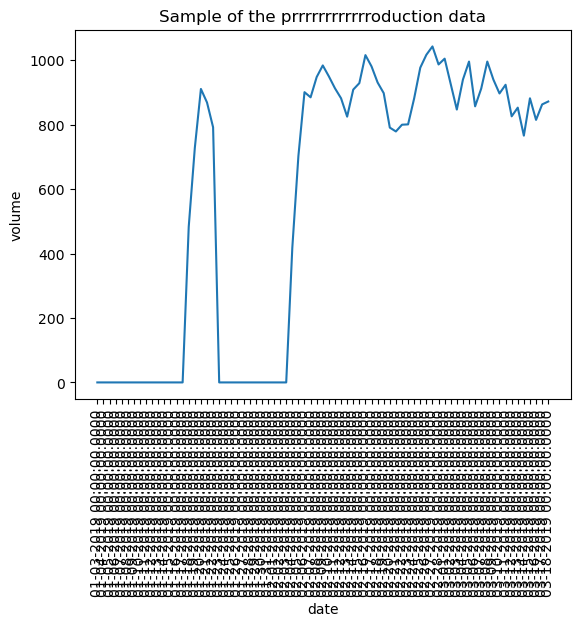

In [137]:
#Just plot a sample of the data
# Define the specific period
start_date = '01-03-2019'
end_date = '31-03-2019'

df['only_date'] = df['date'].str[:10]
df['date_obj'] = pd.to_datetime(df['date'].str[:10], format='%m-%d-%Y')

#Filter the DataFrame for entries within the specific period
filtered_df = df[(df['date_obj'] >= start_date) & (df['date_obj'] <= end_date)]

# Plot the graph
plt.plot(filtered_df['date'], filtered_df['production'])

# Add labels and title
plt.xlabel('date')
plt.ylabel('volume')
plt.title('Sample of the prrrrrrrrrrrroduction data')
plt.xticks(rotation=90)

# Show the plot
plt.show()



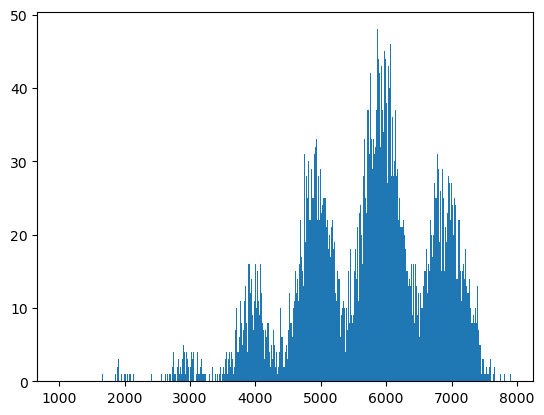

In [138]:
perc_0 = df[df['production'] <= 0.05].production.count() / df.production.count()
mu, sigma = norm.fit(df[df['production'] >= 0.05].production.astype(int))

def model(perc_0, avg, std, size):
    cumul = 0
    for _ in range (size) : 
        if np.random.rand() < perc_0:
            cumul += 0
        else:
            cumul += np.random.normal(loc = avg, scale = std)
    return cumul


def production_simulation(nbr_days) :
    list_production = list()
    for _ in range (10**4) : 
        list_production.append(model(perc_0, avg, std, nbr_days))
    return list_production


simulated_production_data_n_days = production_simulation(NBR_DAYS_PRODUCTION_SIMULATION)
plt.hist(simulated_production_data_n_days, bins=1000);



5699.654892286922


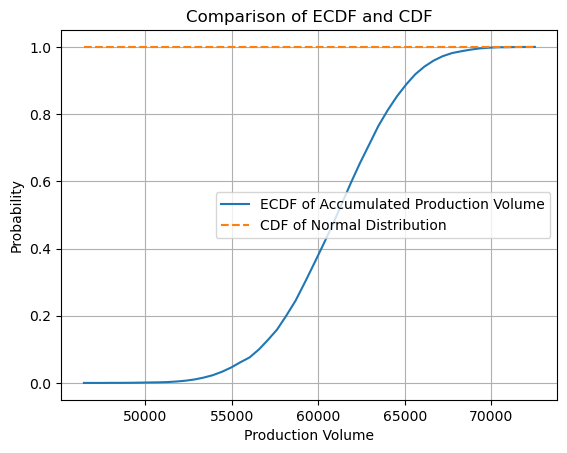

In [141]:
#Compute the CDF of the theoretical normal distribution
mean_volume = np.mean(simulated_production_data_n_days)
std_dev_volume = np.std(simulated_production_data_n_days)
#x_cdf = np.linspace(min(simulated_production_data_n_days), max(simulated_production_data_n_days), 1000)
y_cdf = norm.cdf(xx, loc=mean_volume, scale=std_dev_volume)



plt.plot(xx, Fxx, label='ECDF of Accumulated Production Volume')
plt.plot(xx, y_cdf, label='CDF of Normal Distribution', linestyle='--')
plt.xlabel('Production Volume')
plt.ylabel('Probability')
plt.title('Comparison of ECDF and CDF')
plt.legend()
plt.grid(True)
plt.show()

In [132]:
# check that the ecdf and cdf come closer when the number of days grows ; very time consuming 
from scipy.integrate import simps 

for test_nr_of_days in range (5, 81, 10) :
    simulated_production_data_n_days = production_simulation(test_nr_of_days)
    xx = np.linspace(0,max(simulated_production_data_n_days))
    Fxx = ecdf(simulated_production_data_n_days, xx)
    mean_volume = np.mean(simulated_production_data_n_days)
    std_dev_volume = np.std(simulated_production_data_n_days)
    y_cdf = norm.cdf(xx, loc=mean_volume, scale=std_dev_volume)
    area = simps(np.abs(Fxx - y_cdf), xx)

    #reduce it to fit the same scale 
    #area = area 

    print(area)

125.81145552522179
92.76580034024383
89.33025859000365
83.26056481522657
112.59769040620279
97.2607571105401
76.84857222355198
94.44861029153166
